/Users/juliencatanese/Dropbox/Datascientest/Projet_datascientest/Data_Kaggle
X_train.shape= (89278, 187)
X_test.shape= (22320, 187)
X_valid.shape= (12400, 187)
train score = 0.9102466453101548
test score = 0.899731182795699
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     68175
         1.0       0.91      0.69      0.78     21103

    accuracy                           0.91     89278
   macro avg       0.91      0.84      0.86     89278
weighted avg       0.91      0.91      0.91     89278



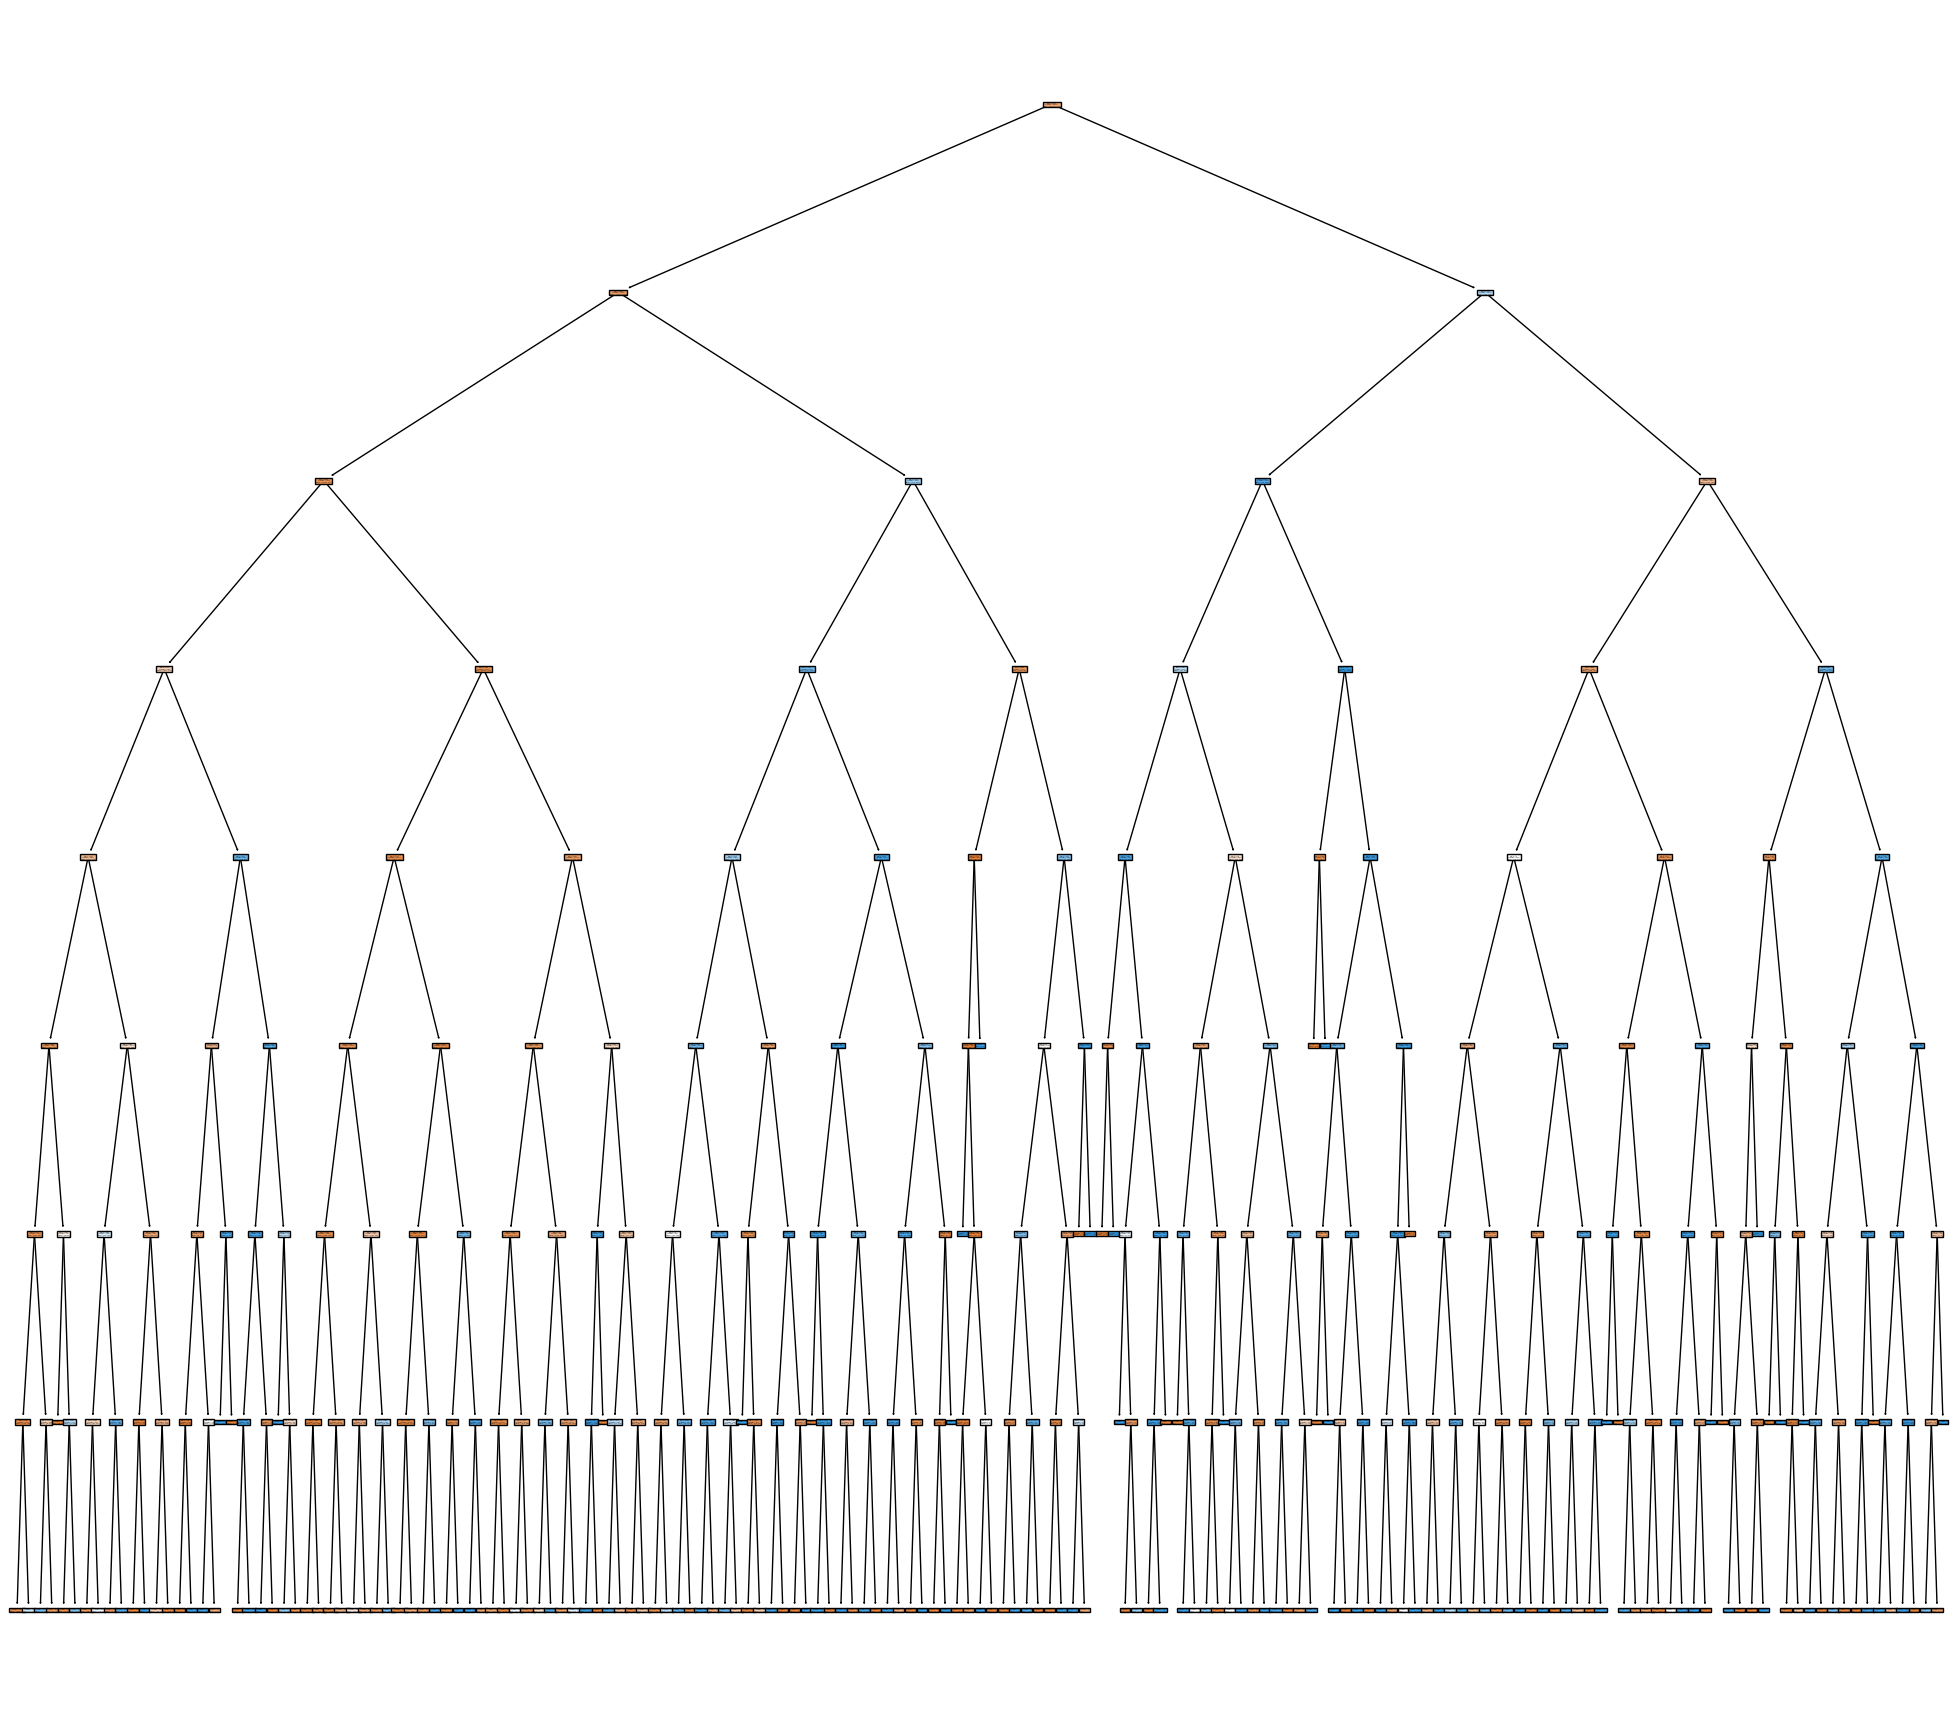

In [2]:
%cd '/Users/juliencatanese/Dropbox/Datascientest/Projet_datascientest/Data_Kaggle/'
%pwd


import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# import tensorflow as tf

# Lecture des donnees PTB.csv
ptb_abnormal = pd.read_csv('./ptbdb_abnormal.csv', header=None)
ptb_normal = pd.read_csv('./ptbdb_normal.csv', header=None)

# Concatenation des deux DataFrames
ptb = pd.concat([ptb_normal, ptb_abnormal], ignore_index=True, sort=False)
ptb.rename(columns={187 :'class'}, inplace=True)

# Lecture des donnees MIT.csv
mit_train = pd.read_csv('./mitbih_train.csv', header=None)
mit_test = pd.read_csv('./mitbih_test.csv', header=None)

# Concatenation des deux DataFrames
mit = pd.concat([mit_train, mit_test], ignore_index=True, sort=False)
mit.rename(columns={187 :'class'}, inplace=True)

# Groupement des classes non-normal (1,2,3,4) en une seule classe Anormal (label=1)
mit['class'].replace({2:1,3:1,4:1}, inplace=True)

# Concatenation des jeux de donnees PTB et MIT  
data = pd.concat([ptb, mit], ignore_index=True, sort=False)

y = data['class'].copy()
X = data.drop('class', axis=1).copy()

X_train90, X_valid, y_train90, y_valid = train_test_split(X, y, train_size=0.9, random_state=1,shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X_train90, y_train90, train_size=0.8, random_state=1,shuffle=True)
print('X_train.shape=',X_train.shape)
print('X_test.shape=',X_test.shape)
print('X_valid.shape=',X_valid.shape)


from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report

X = X_train
y = y_train



model = DecisionTreeClassifier(max_depth=8, random_state = 123)
model.fit(X, y)
print('train score =',model.score(X, y))
print('test score =',model.score(X_test, y_test))
y_pred = model.predict(X)
print(classification_report(y, y_pred))


from sklearn.tree import plot_tree
import matplotlib.pyplot as plt; 
%matplotlib inline


plt.figure(figsize=(25,22))
plot_tree(model, filled=True, feature_names=X_train.columns.to_list() );




max_depth= 4
max_depth= 8
max_depth= 12
max_depth= 16
max_depth= 20


Text(0.5, 0, 'depth')

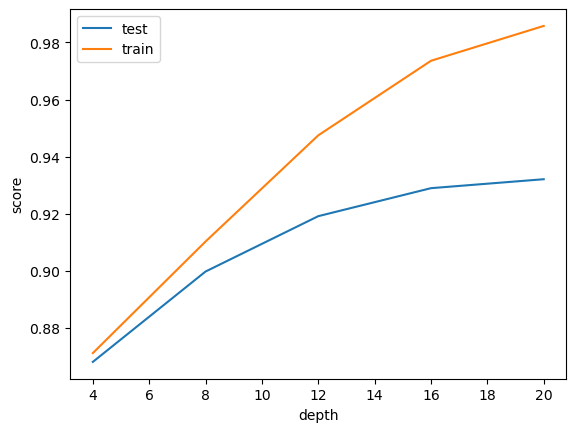

In [5]:
test_score=[]; 
train_score=[]; 
Xaxis=[];
ImportanceCurve=[];

for max_depth in range(4,21,4): 
    print('max_depth=',max_depth)
    Xaxis.append(max_depth) 
    model = DecisionTreeClassifier(max_depth=max_depth, random_state = 123)
    model.fit(X, y)
    train_score.append(model.score(X, y))
    test_score.append(model.score(X_test, y_test))  
    ImportanceCurve.append(model.feature_importances_)

    
plt.figure(2)
plt.plot(Xaxis,test_score, label='test')
plt.plot(Xaxis,train_score, label='train')
plt.legend(); plt.ylabel('score'); plt.xlabel('depth')


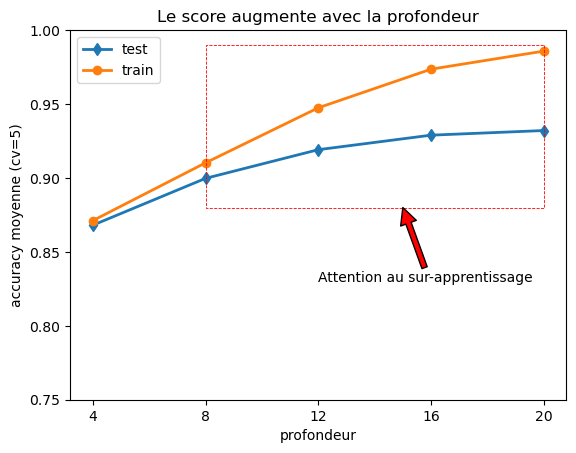

In [6]:
    
plt.figure(2)
plt.plot(Xaxis,test_score, '-d',label='test',lw=2)
plt.plot(Xaxis,train_score, '-o',label='train', lw=2)
plt.legend(); 
plt.ylabel('accuracy moyenne (cv=5)'); 
plt.xlabel('profondeur');
plt.xticks(Xaxis);
plt.ylim([0.75, 1]);
plt.title('Le score augmente avec la profondeur')
plt.annotate('Attention au sur-apprentissage', xy=[15, 0.88], xytext=[12, 0.83],arrowprops={'facecolor':'red'})
plt.plot([20,20,8,8,20],[.99,.88,.88,.99,.99],'--r', lw=0.6)

Text(0.5, 1.0, 'average+/-std')

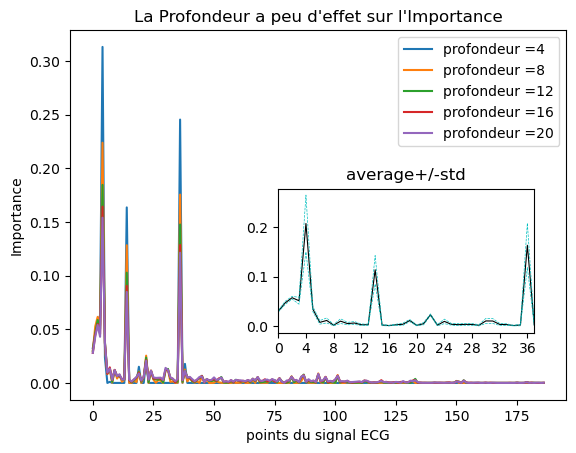

In [7]:
plt.figure(3)
for i in range(len(Xaxis)):
    plt.plot(ImportanceCurve[i], label= 'profondeur =' + str(Xaxis[i]))
plt.legend();
plt.xlabel('points du signal ECG')
plt.ylabel('Importance')
plt.title("La Profondeur a peu d'effet sur l'Importance")

plt.axes([0.45, 0.25, 0.4, 0.3])
plt.plot(np.mean(ImportanceCurve,axis=0), 'k' ,lw=0.8);
plt.plot(np.std(ImportanceCurve,axis=0) + np.mean(ImportanceCurve,axis=0), '--c', lw=0.5);
plt.plot(- np.std(ImportanceCurve,axis=0) + np.mean(ImportanceCurve,axis=0), '--c', lw=0.5);
plt.xlim([0,37]), 
plt.xticks(range(0,37,4));
plt.title('average+/-std')

Text(0.5, 1.0, 'Importance forte dans le premier quart-temps des ECG')

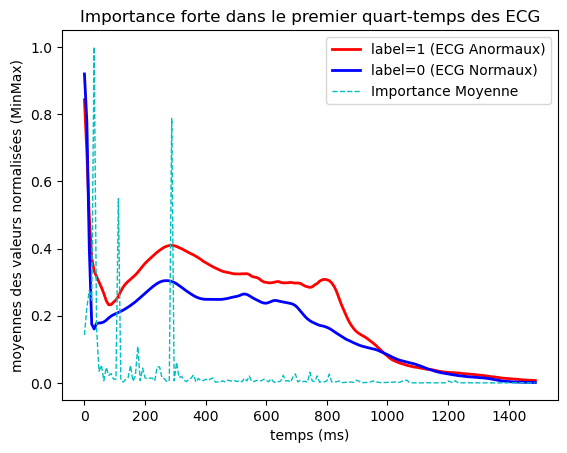

In [34]:
sr=125
Xms=(np.arange(0,187)/sr)*1000
AVGimportance = np.mean(ImportanceCurve,axis=0)

# plt.plot(Xms, X.mean(), 'r', lw=2, label='X_train average')
plt.plot(Xms, X[y==1].mean(), 'r', lw=2, label='label=1 (ECG Anormaux)')
plt.plot(Xms, X[y==0].mean(), 'b', lw=2, label='label=0 (ECG Normaux)')

plt.plot(Xms,AVGimportance/np.max(AVGimportance), '--c', lw=1, label='Importance Moyenne');

plt.legend()
plt.xlabel('temps (ms)')
plt.ylabel('moyennes des valeurs normalisées (MinMax)')
plt.title("Importance forte dans le premier quart-temps des ECG")
